In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization 

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning 
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

# Dimensionality Reduction have 3 applications:

* 1) Fast Training

* 2) Compression

* 3) Visualization

## We will cover them on real life dataset Mnist_784 features
---

# 1) Fast Training

In [3]:
from sklearn.datasets import fetch_openml

data_obj = fetch_openml('mnist_784', as_frame=True)
X = data_obj['data']
y = data_obj['target']
X

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0         0         0   
3            0  ...         0         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         0         0         0         0         0  
69996         0         0         0         0         0  
69997         0         0         0         0         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 784 columns]

'5'

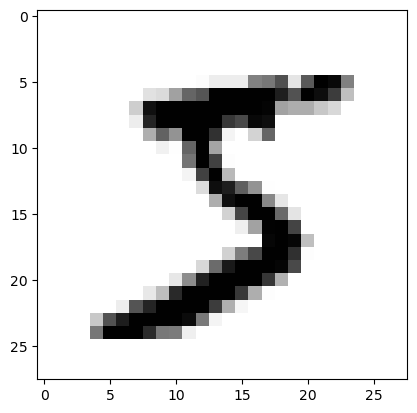

In [6]:
img = np.array(X.iloc[0, :]).reshape(28, 28)
plt.imshow(img, cmap='binary')
y[0]

In [23]:
X.shape

(70000, 784)

In [ ]:
np.cov(X.T) # covariance matrix of data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
eig_values, eig_vectors = np.linalg.eig(np.cov(X.T)) # eig values and eig vectors of covariance matrix
eig_vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
eig_values

array([ 3.34294061e+05,  2.45433427e+05,  2.10930355e+05,  1.85337356e+05,
        1.67691572e+05,  1.47670297e+05,  1.12445139e+05,  9.91153833e+04,
        9.46125388e+04,  8.03359569e+04,  7.22599113e+04,  6.98885540e+04,
        5.85527059e+04,  5.81052758e+04,  5.43103821e+04,  5.09819786e+04,
        4.52543057e+04,  4.38704888e+04,  4.07237248e+04,  3.95459992e+04,
        3.65654146e+04,  3.46361826e+04,  3.28991121e+04,  3.12006965e+04,
        3.02969450e+04,  2.87716612e+04,  2.77774204e+04,  2.69503081e+04,
        2.53911681e+04,  2.36676475e+04,  2.21397823e+04,  2.25058928e+04,
        2.06082429e+04,  2.00866202e+04,  1.94397800e+04,  1.86411711e+04,
        1.73119138e+04,  1.67069383e+04,  1.64282735e+04,  1.60385718e+04,
        1.55849505e+04,  1.52607921e+04,  1.43449274e+04,  1.35885149e+04,
        1.31612657e+04,  1.28895069e+04,  1.23970063e+04,  1.19716256e+04,
        1.16185734e+04,  1.09656535e+04,  1.08681675e+04,  1.06380432e+04,
        1.01693456e+04,  

In [ ]:
eig_vectors.shape # [V1| V2|]

(784, 784)

In [ ]:
eig_values.shape

In [37]:
complex(2, 3)

(2+3j)

In [42]:
X_centerd = X - X.mean(axis=0)
X_centerd

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   
1          0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   
2          0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   
3          0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   
4          0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   
69996      0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   
69997      0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   
69998      0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   
69999      0.0  ... -0.197414 -0.099543 -0.046629 -0.016614 -0.012957   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0     -0.001714       0.0       0.0       0.0       0.0  
1     -0.001714       0.0       0.0       0.0       0.0  
2     -0.001714       0.0       0.0       0.0       0.0  
3     -0.001714       0.0       0.0       0.0       0.0  
4     -0.001714       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995 -0.001714       0.0       0.0       0.0       0.0  
69996 -0.001714       0.0       0.0       0.0       0.0  
69997 -0.001714       0.0       0.0       0.0       0.0  
69998 -0.001714       0.0       0.0       0.0       0.0  
69999 -0.001714       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

In [ ]:
# PCA Implementation using numpy
X_centerd = X - X.mean(axis=0)
eig_values, eig_vectors = np.linalg.eig(np.cov(X_centerd.T))
sorted_indices = np.argsort(eig_values)[::-1] 
eig_values_sorted = eig_values[sorted_indices]  
eig_vectors_sorted = eig_vectors[:, sorted_indices]  

k = 2
top_k_eig_vectors = eig_vectors_sorted[:, :k]
X_reduced = X_centerd @ top_k_eig_vectors.real
X_reduced # 70K * 2

0           1
0       122.255255 -316.233844
1      1010.494003 -289.963621
2       -58.995947  393.697445
3      -796.965019 -607.421250
4      -391.318921  729.804185
...            ...         ...
69995   305.693874 -549.645167
69996   569.186045 -699.027039
69997  -271.507013  590.078500
69998  -310.224823 -116.727151
69999  1058.862126  -83.392538

[70000 rows x 2 columns]

In [41]:
# X_recovered
X_recovered = X_reduced @ top_k_eig_vectors.T.real
X_recovered

0    1    2    3    4    5    6    7    8    9    ...       774  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.156938   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.164689   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.193224   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.277570   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.364707   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
69995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.274930   
69996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.353824   
69997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.293843   
69998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.049705   
69999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.065141   

            775       776       777       778       779  780  781  782  783  
0     -0.073106 -0.034082 -0.009651 -0.005822 -0.000593  0.0  0.0  0.0  0.0  
1     -0.064077 -0.031767 -0.009391 -0.006043 -0.000485  0.0  0.0  0.0  0.0  
2      0.091321  0.042377  0.011959  0.007175  0.000744  0.0  0.0  0.0  0.0  
3     -0.143817 -0.064872 -0.017915 -0.010374 -0.001206  0.0  0.0  0.0  0.0  
4      0.168356  0.078718  0.022338  0.013522  0.001361  0.0  0.0  0.0  0.0  
...         ...       ...       ...       ...       ...  ...  ...  ...  ...  
69995 -0.126759 -0.059292 -0.016830 -0.010192 -0.001025  0.0  0.0  0.0  0.0  
69996 -0.160616 -0.075510 -0.021513 -0.013104 -0.001291  0.0  0.0  0.0  0.0  
69997  0.136271  0.063621  0.018034  0.010898  0.001104  0.0  0.0  0.0  0.0  
69998 -0.028154 -0.012376 -0.003348 -0.001871 -0.000242  0.0  0.0  0.0  0.0  
69999 -0.015901 -0.009578 -0.003165 -0.002340 -0.000090  0.0  0.0  0.0  0.0  

[70000 rows x 784 columns]

In [ ]:
# PCA Implementation using SVD (Vt have components (Z1, Z2, ...) of matrix X)
X_copy = X.copy().iloc[:10_000, :] # just first 10k for memory errors

X_centerd = X_copy - X_copy.mean(axis=0) # 70k x 784
U, E, Vt = np.linalg.svd(X_centerd)
X_reduced_svd = X_centerd @ Vt[:2, :].T # X_reduced (70k, 2) = X_centered (70k, 784) @ Vt[:2, :].T # 784 * 2
X_reduced_svd

0           1
0     -108.229105  336.867851
1    -1026.546772  381.932498
2       41.729643 -405.237670
3      884.340937  568.873126
4      340.797660 -739.961313
...           ...         ...
9995    43.868987  599.626206
9996   187.708010   27.234328
9997   485.476156  337.317859
9998   364.624558 -475.531718
9999   337.371377 -591.895267

[10000 rows x 2 columns]

In [ ]:
# Sklearn Implementation
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42) #  center data by its self
X_reduced_pca = pca.fit_transform(X) # X_reduced = X @ eigen_vector
X_reduced_pca

array([[ 122.25525533,  316.23384391],
       [1010.49400346,  289.96362059],
       [ -58.99594719, -393.69744499],
       ...,
       [-271.50701323, -590.07850009],
       [-310.22482291,  116.72715081],
       [1058.86212574,   83.39253843]])

In [ ]:
X_recovered_pca = pca.inverse_transform(X_reduced_pca) # X_recovered = X_reduced @ eigen_vector.T
X_recovered_pca

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Right Number of dimensions

In [ ]:
# method-1 n_components=0.95

pca = PCA() #  center data by its self
X_reduced_pca = pca.fit_transform(X) # X_reduced = X @ eigen_vector
X_reduced_pca.shape

(70000, 784)

In [53]:
pca.components_ # Vt

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [56]:
d = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
d

154

In [57]:
pca_95 = PCA(n_components=0.95)
X_reduced_95_var = pca_95.fit_transform(X)
X_reduced_95_var.shape

(70000, 154)

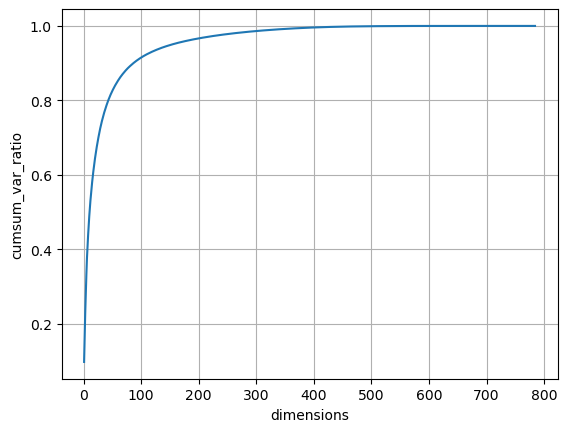

In [ ]:
# method-2 plot (dimensions, cumsum)
dimensions = np.arange(1, 785)
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
# px.line(x=dimensions, y=cumsum_var_ratio)
plt.plot(dimensions, cumsum_var_ratio)
plt.xlabel("dimensions")
plt.ylabel("cumsum_var_ratio")
plt.grid()
plt.show() # d = 90

In [66]:
# method-3: fine tune hyperparamter

# 2) Compression

'5'

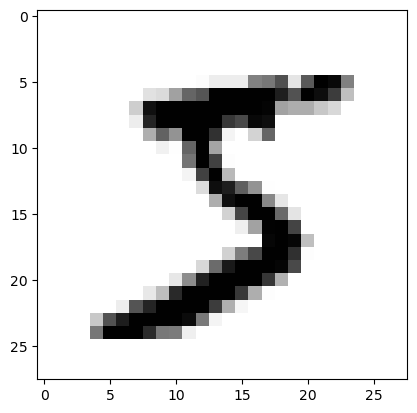

In [69]:
img = np.array(X.iloc[0, :]).reshape(28, 28)
plt.imshow(img, cmap='binary')
y[0]

In [68]:
X_recovered_mnist_95 = pca_95.inverse_transform(X_reduced_95_var) # (70K, 784)
X_recovered_mnist_95

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

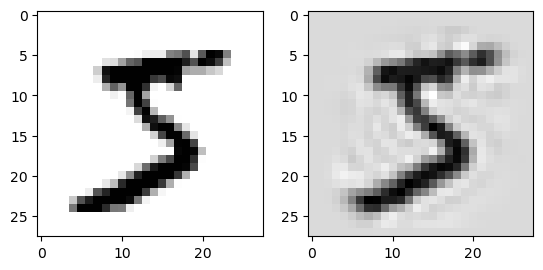

In [71]:
img_recovered = np.array(X_recovered_mnist_95[0, :]).reshape(28, 28)
fig, axes = plt.subplots(nrows=1, ncols=2)


axes[0].imshow(img, cmap='binary')
axes[1].imshow(img_recovered, cmap='binary')
plt.show()

# Randomized PCA

In [ ]:
# if n_features > 2000
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42) # svd_solver="randomized" / 'full' / 'auto' => d < 0.8 * n will make it randomized 
X_reduced = rnd_pca.fit_transform(X)
np.sum(rnd_pca.explained_variance_ratio_)

0.9500013345384946

# Incremental PCA

In [ ]:
# if very large data 

# Split Data in ML (1) np.array_split()
from sklearn.decomposition import IncrementalPCA
inc_pca = IncrementalPCA(n_components=154)

n_batches = 100
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)
sum(inc_pca.explained_variance_ratio_)

0.9496651061456747

In [77]:
X_reduced = inc_pca.transform(X)
X_reduced.shape

(70000, 154)

In [ ]:
# (2) save memmap
filename = "mnist_digits.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X.shape)
X_mmap[:] = X  # could be a loop instead, saving the data chunk by chunk
X_mmap.flush() # save data in disk

In [111]:
# read memmap
X_mmap = np.memmap(filename, dtype='float32', mode='readonly', shape=X.shape).reshape(X.shape)

# train model 
batch_size = X_mmap.shape[0] // n_batches
inc_pca_2 = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca_2.fit(X_mmap)

IncrementalPCA(batch_size=700, n_components=154)

In [112]:
sum(inc_pca_2.explained_variance_ratio_)

0.949665102627738

# Random Projection

In [ ]:
# feats >= 20K
from sklearn.random_projection import johnson_lindenstrauss_min_dim
m, ε = 5_000, 0.1 # rows
d = johnson_lindenstrauss_min_dim(m, eps=ε) # d ≥ 4 log(m) / (½ ε² - ⅓ ε³)
d

7300

In [ ]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d)  # std dev = square root of variance 
X = np.random.randn(m, n)  # generate a fake dataset # (5000, 20K)
X_reduced = X @ P.T

In [ ]:
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
gaussian_rnd_proj = GaussianRandomProjection(eps=ε, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)  # same result as above
X_reduced.shape # 

(5000, 7300)

In [ ]:
## took long time so stoped the code
# components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_) # (20000, 7300)
# X_recovered = X_reduced @ components_pinv.T # 
# X_recovered.shape

: 

: 

# Manifold

# 3) Visualization

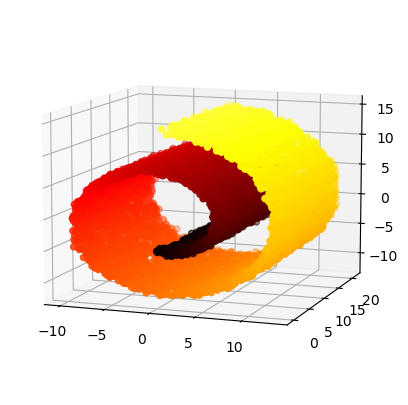

In [2]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=10000, noise=0.2, random_state=42)

from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
# set_xyz_axes(ax, axes)
# save_fig("swiss_roll_plot")
plt.show()

In [5]:
fig = px.scatter_3d(
    x=X_swiss[:, 0],  # First dimension of Swiss Roll
    y=X_swiss[:, 1],  # Second dimension of Swiss Roll
    z=X_swiss[:, 2],  # Third dimension of Swiss Roll
    color=t,    # Use `t` for color scale
    title="Swiss Roll 3D Scatter Plot",
    labels={'x': 'X-axis', 'y': 'Y-axis', 'z': 'Z-axis'}
)

# Customize and display the plot
fig.update_traces(marker=dict(size=3))  # Set marker size
fig.show()

In [17]:
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42) # increase n_neightbors if not correct to preserve more linear relation 
X_swiss_2d = lle.fit_transform(X_swiss)

fig = px.scatter(
    x=X_swiss_2d[:, 0],  # First dimension
    y=X_swiss_2d[:, 1],  # Second dimension
    color=t,             # Use `t` for color scale
    title='2D Representation of Swiss Roll (LLE)',
    labels={'x': 'Dimension 1', 'y': 'Dimension 2'}
)

# Customize and display the plot
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
## MDS took longer than 30 minutes so stoped it

# mds = MDS(n_components=2, normalized_stress=False, random_state=42) # increase n_neightbors if not correct to preserve more linear relation 
# X_swiss_2d = mds.fit_transform(X_swiss)

# fig = px.scatter(
#     x=X_swiss_2d[:, 0],  # First dimension
#     y=X_swiss_2d[:, 1],  # Second dimension
#     color=t,             # Use `t` for color scale
#     title='2D Representation of Swiss Roll (MDS)',
#     labels={'x': 'Dimension 1', 'y': 'Dimension 2'}
# )

# # Customize and display the plot
# fig.update_traces(marker=dict(size=5))
# fig.show()

KeyboardInterrupt: 

In [15]:
isomap = Isomap(n_components=2, n_neighbors=10) # increase n_neightbors if not correct to preserve more linear relation 
X_swiss_2d = isomap.fit_transform(X_swiss)

fig = px.scatter(
    x=X_swiss_2d[:, 0],  # First dimension
    y=X_swiss_2d[:, 1],  # Second dimension
    color=t,             # Use `t` for color scale
    title='2D Representation of Swiss Roll (Isomap)',
    labels={'x': 'Dimension 1', 'y': 'Dimension 2'}
)

# Customize and display the plot
fig.update_traces(marker=dict(size=5))
fig.show()

In [16]:
tsne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=42) # increase n_neightbors if not correct to preserve more linear relation 
X_swiss_2d = tsne.fit_transform(X_swiss)

fig = px.scatter(
    x=X_swiss_2d[:, 0],  # First dimension
    y=X_swiss_2d[:, 1],  # Second dimension
    color=t,             # Use `t` for color scale
    title='2D Representation of Swiss Roll (TSNE)',
    labels={'x': 'Dimension 1', 'y': 'Dimension 2'}
)

# Customize and display the plot
fig.update_traces(marker=dict(size=5))
fig.show()

## MNist_784 Digits Visualization

In [18]:
from sklearn.datasets import fetch_openml

data_obj = fetch_openml('mnist_784', as_frame=True)
X = data_obj['data']
t = data_obj['target']

tsne = TSNE(n_components=2, learning_rate="auto", random_state=42) # increase n_neightbors if not correct to preserve more linear relation 
X_2d = tsne.fit_transform(X)

fig = px.scatter(
    x=X_2d[:, 0],  # First dimension
    y=X_2d[:, 1],  # Second dimension
    color=t,             # Use `t` for color scale
    title='2D Representation of Digits (TSNE)',
    labels={'x': 'Dimension 1', 'y': 'Dimension 2'}
)

# Customize and display the plot
fig.update_traces(marker=dict(size=5))
fig.show()